In [55]:
%run '0.0_init_configuration.ipynb'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
df = pd.read_csv('../../data/processed/datos_procesados_penguins.csv')
df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Análisis bivariado

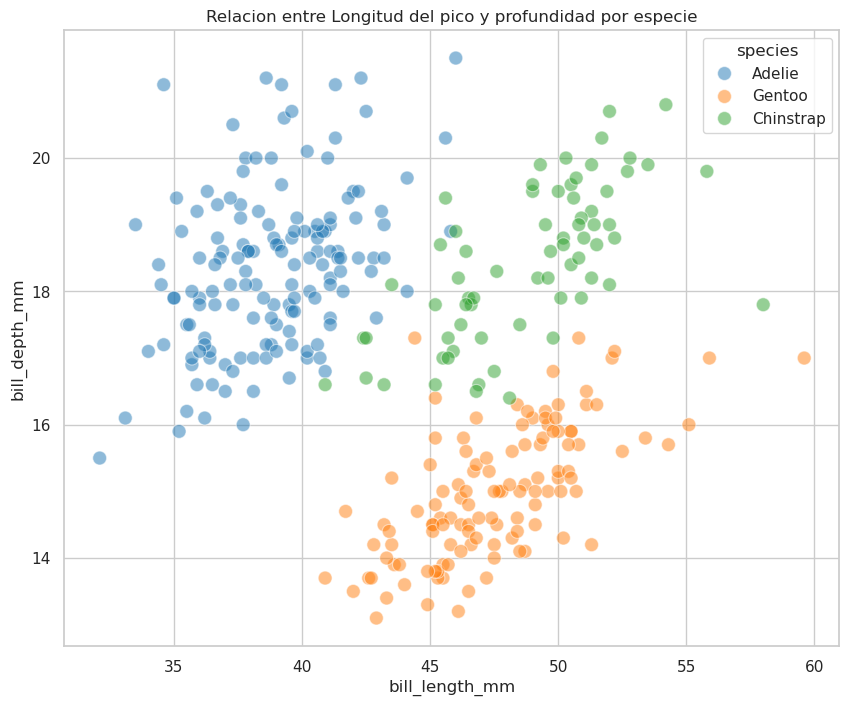

In [57]:
sns.scatterplot(data=df,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='species',
                alpha=1/2,
                s=100)

plt.title("Relacion entre Longitud del pico y profundidad por especie")
plt.show()

### Estimación de densidad por especie de pinguinos entre las variables:


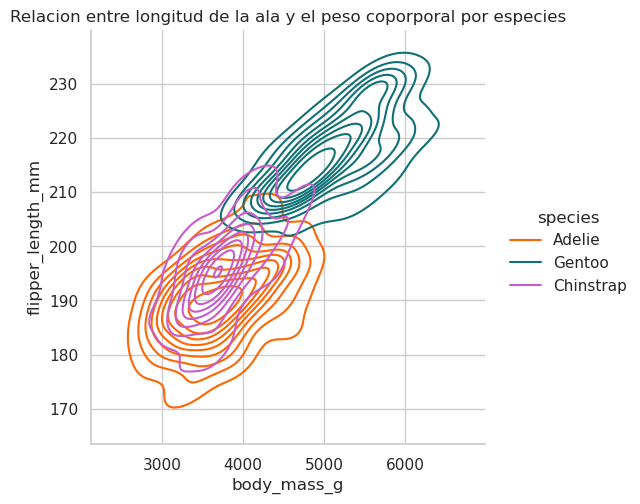

In [58]:
sns.displot(data=df,
            x='body_mass_g',
            y='flipper_length_mm',
            kind='kde',
            hue='species',
            palette=penguin_color)

plt.title('Relacion entre longitud de la ala y el peso coporporal por especies')

plt.show()

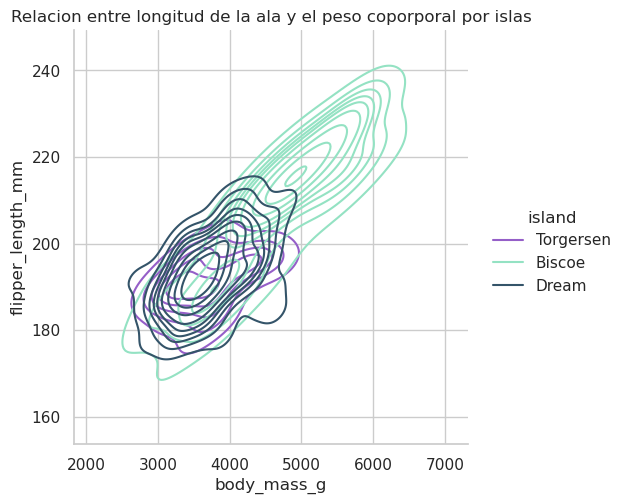

In [59]:
sns.displot(data=df,
            x='body_mass_g',
            y='flipper_length_mm',
            kind='kde',
            hue='island',
            palette=penguin_color)

plt.title('Relacion entre longitud de la ala y el peso coporporal por islas')

plt.show()

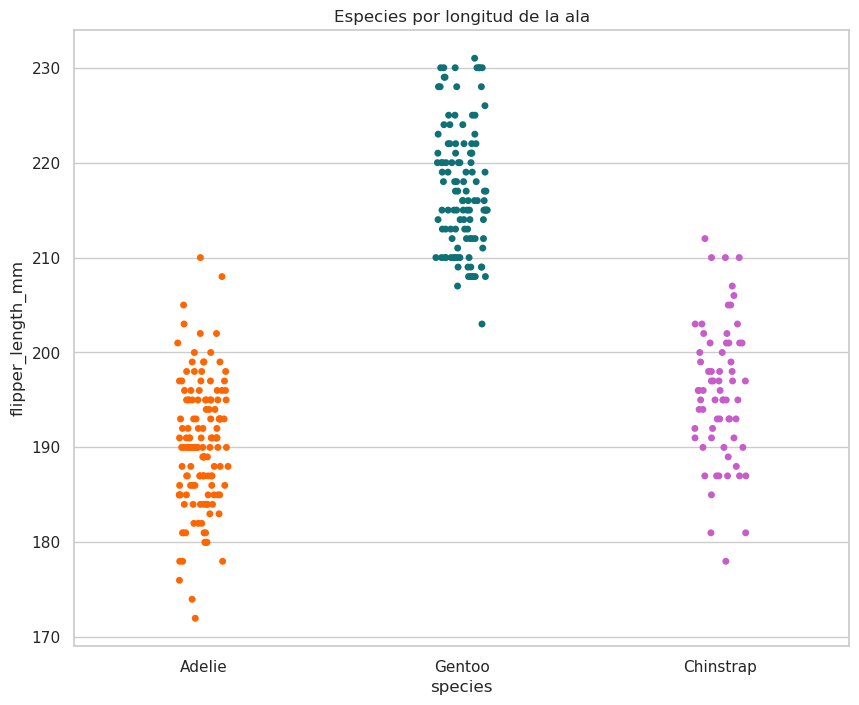

In [60]:
sns.stripplot(data=df,
              x='species',
              y='flipper_length_mm',
              hue='species',
              palette=penguin_color)
plt.title('Especies por longitud de la ala')
plt.show()

In [61]:
categories = df.select_dtypes(include=np.number).columns
categories

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year'],
      dtype='object')

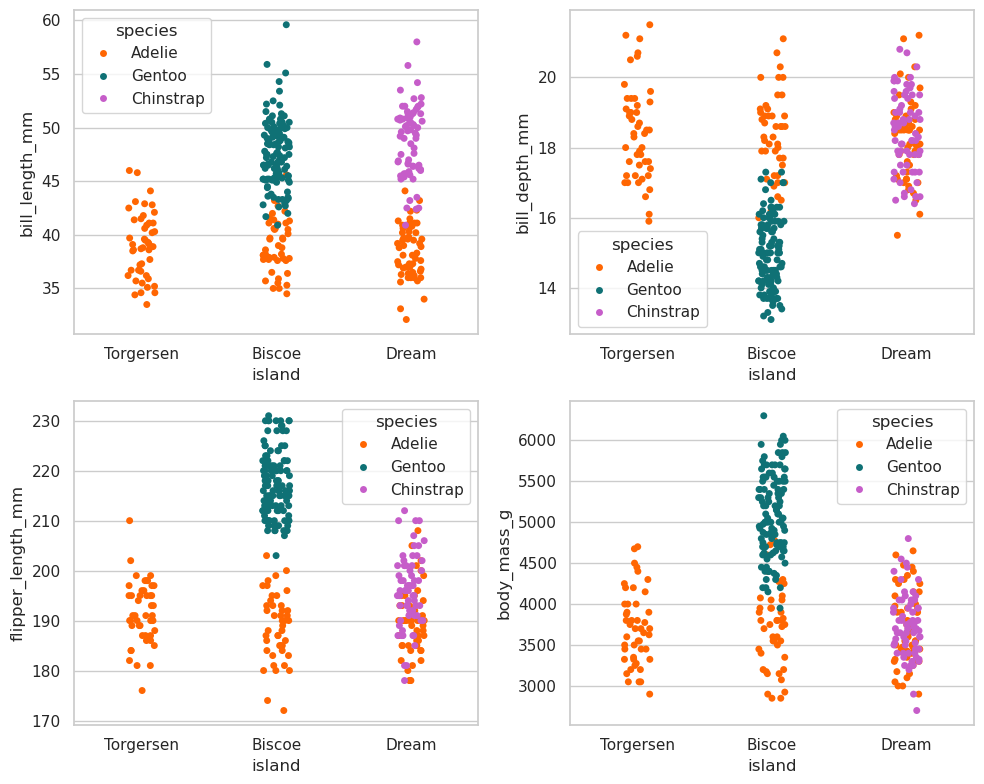

In [64]:
fig, ax = plt.subplots(2,2)

ax = ax.flatten()

for i in range(len(categories)-1):
    sns.stripplot(ax=ax[i],
                  data=df,
                  x='island',
                  y=categories[i],
                  hue='species',
                  palette=penguin_color)
    


plt.tight_layout()
plt.show()

### Matrice de correlación

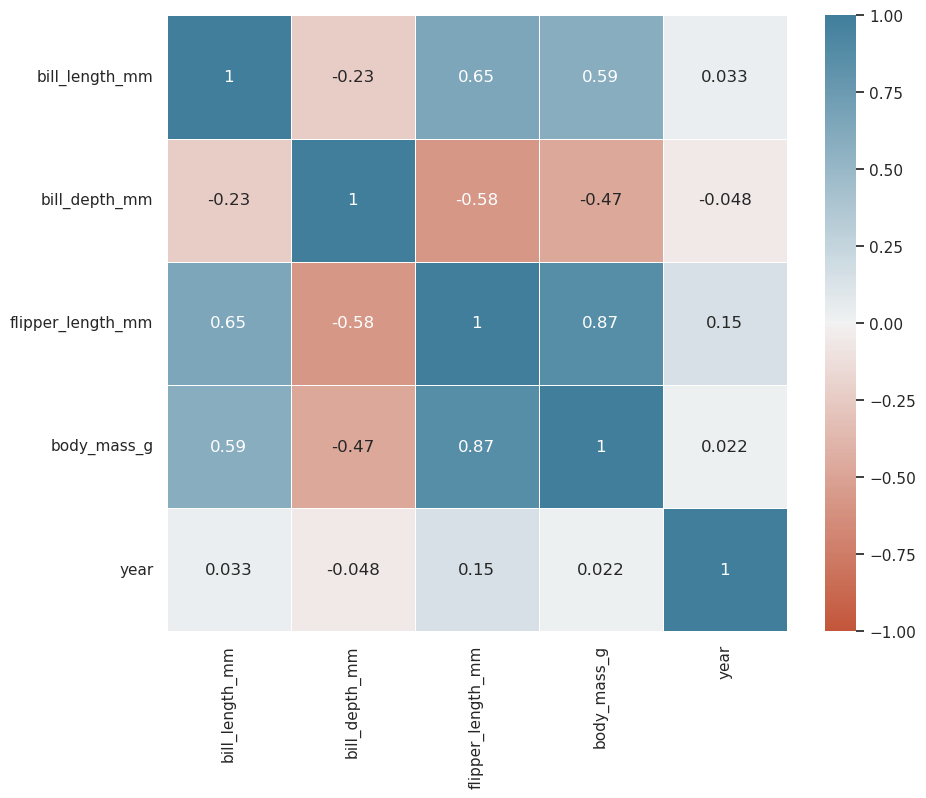

In [65]:
corr = df.corr(numeric_only=True)

sns.heatmap(data=corr,
            cmap=sns.diverging_palette(20,230, as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            cbar={'shring':0.5},
            annot=True)

plt.show()